In [2]:
# ------------------------
# --- INITIAL SETUP ---
# ------------------------

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Auxiliary function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    """This function plots the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g') # annot=True to annotate cells, fmt='g' to avoid scientific notation
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the data
print("--- Loading Data ---")
try:
    URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
    data = pd.read_csv(URL1)
    URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
    X = pd.read_csv(URL2)
    print("Data loaded successfully from URLs.")
except Exception as e:
    print(f"Error loading data from URLs: {e}")
    print("Using placeholder data for demonstration.")
    # Placeholder data (if URLs fail or for offline use)
    data = pd.DataFrame({'Class': np.random.randint(0, 2, 90)}) # 90 samples
    # The actual X dataset has 83 features.
    X_actual_num_features = 83
    X = pd.DataFrame(np.random.rand(90, X_actual_num_features), columns=[f'feature_{i+1}' for i in range(X_actual_num_features)])

print("\nShape of 'data' (contains target 'Class'):", data.shape)
print("Shape of 'X' (features):", X.shape)
print("\nFirst 5 rows of 'data' ('Class' column):")
print(data[['Class']].head())
print("\nFirst 5 rows of 'X' (features):")
print(X.head())
print("\nInitial setup complete.")

--- Loading Data ---
Data loaded successfully from URLs.

Shape of 'data' (contains target 'Class'): (90, 18)
Shape of 'X' (features): (90, 83)

First 5 rows of 'data' ('Class' column):
   Class
0      0
1      0
2      0
3      0
4      0

First 5 rows of 'X' (features):
   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0

In [3]:
# ------------------------
# --- TASK 1 ---
# ------------------------
print("\n--- TASK 1: Create Y array ---")
Y = data['Class'].to_numpy()
print("Type of Y:", type(Y))
print("First 5 elements of Y:", Y[:5])
print("Shape of Y:", Y.shape)


--- TASK 1: Create Y array ---
Type of Y: <class 'numpy.ndarray'>
First 5 elements of Y: [0 0 0 0 0]
Shape of Y: (90,)


In [4]:
# ------------------------
# --- TASK 2 ---
# ------------------------
print("\n--- TASK 2: Instantiate StandardScaler ---")
# We'll instantiate a scaler object here as per the lab's structure.
# A new scaler instance will be used for the actual fit/transform operations later for clarity.
transform_task2 = preprocessing.StandardScaler()
print(f"StandardScaler object ({transform_task2}) created for Task 2.")



--- TASK 2: Instantiate StandardScaler ---
StandardScaler object (StandardScaler()) created for Task 2.


In [5]:
# ------------------------
# --- TASK 3 ---
# ------------------------
print("\n--- TASK 3: Split data into training and test sets ---")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print('Train set shape (X_train, Y_train):', X_train.shape, Y_train.shape)
print('Test set shape (X_test, Y_test):', X_test.shape, Y_test.shape)
print("Number of records in Y_test:", Y_test.shape[0])


--- TASK 3: Split data into training and test sets ---
Train set shape (X_train, Y_train): (72, 83) (72,)
Test set shape (X_test, Y_test): (18, 83) (18,)
Number of records in Y_test: 18


In [6]:
# -------------------------------------
# --- APPLYING STANDARDIZATION ---
# -------------------------------------
print("\n--- Applying Standardization (Post-Split) ---")
scaler = preprocessing.StandardScaler() # Create a new scaler instance

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the SAME fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

print("X_train scaled successfully.")
print("X_test scaled successfully.")
# Optional: Verify mean and std of scaled training data (should be close to 0 and 1)
# print("Mean of X_train_scaled (first 3 features):", np.mean(X_train_scaled[:,:3], axis=0))
# print("Std of X_train_scaled (first 3 features):", np.std(X_train_scaled[:,:3], axis=0))


--- Applying Standardization (Post-Split) ---
X_train scaled successfully.
X_test scaled successfully.



--- TASK 4: Logistic Regression with GridSearchCV ---

Tuned hyperparameters (best parameters) for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.8464

Logistic Regression Test Set Performance:
Test Accuracy: 0.8333
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Logistic Regression Confusion Matrix:


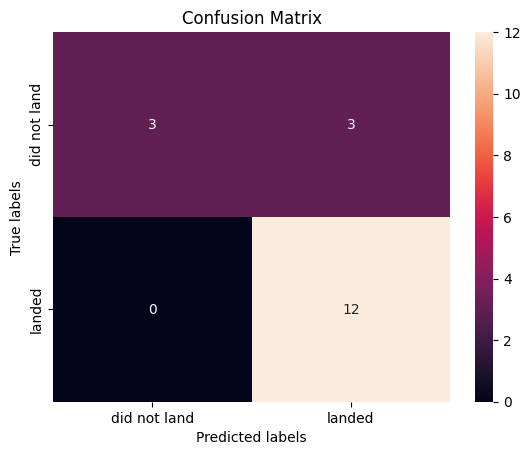

In [7]:
# ------------------------
# --- TASK 4 ---
# ------------------------
print("\n--- TASK 4: Logistic Regression with GridSearchCV ---")
# Define the model
lr = LogisticRegression()

# Define the parameters for GridSearchCV
parameters_lr = {'C': [0.01, 0.1, 1, 10, 100],
                 'penalty': ['l2'],
                 'solver': ['lbfgs']}

# Create GridSearchCV object (using cv=10 as per original instruction intent)
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters_lr, cv=10, n_jobs=-1) # n_jobs=-1 uses all processors

# Fit the GridSearchCV object to the scaled training data
logreg_cv.fit(X_train_scaled, Y_train)

# Output the best parameters and accuracy
print("\nTuned hyperparameters (best parameters) for Logistic Regression:", logreg_cv.best_params_)
print("Best cross-validation accuracy for Logistic Regression: {:.4f}".format(logreg_cv.best_score_))

# Predictions on the scaled test set
y_pred_logreg = logreg_cv.predict(X_test_scaled)

# Evaluate the model
print("\nLogistic Regression Test Set Performance:")
logreg_test_accuracy = accuracy_score(Y_test, y_pred_logreg)
print(f"Test Accuracy: {logreg_test_accuracy:.4f}")
print(classification_report(Y_test, y_pred_logreg))

# Plot confusion matrix
print("\nLogistic Regression Confusion Matrix:")
plot_confusion_matrix(Y_test, y_pred_logreg)


In [8]:
# ------------------------
# --- TASK 5 ---
# ------------------------
print("\n--- TASK 5: Accuracy of Tuned Logistic Regression on Test Data ---")
# The accuracy on the test data for the tuned Logistic Regression model was calculated in TASK 4.
# We stored it in 'logreg_test_accuracy'.
print(f"Accuracy of the tuned Logistic Regression model on the test data: {logreg_test_accuracy:.4f}")
# The confusion matrix was also plotted at the end of TASK 4.


--- TASK 5: Accuracy of Tuned Logistic Regression on Test Data ---
Accuracy of the tuned Logistic Regression model on the test data: 0.8333


In [9]:
# ------------------------
# --- TASK 6 ---
# ------------------------
print("\n--- TASK 6: Support Vector Machine (SVM) with GridSearchCV ---")
# Define the model
svm = SVC()

# Define the parameters for GridSearchCV
parameters_svm = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                  'C': np.logspace(-3, 2, 6),  # Range: 0.001 to 100 (6 steps)
                  'gamma': np.logspace(-3, 2, 6)} # For 'rbf', 'poly', 'sigmoid'

# Create GridSearchCV object
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters_svm, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the scaled training data
svm_cv.fit(X_train_scaled, Y_train)

print("\nTuned hyperparameters (best parameters) for SVM:", svm_cv.best_params_)
print("Best cross-validation accuracy for SVM: {:.4f}".format(svm_cv.best_score_))


--- TASK 6: Support Vector Machine (SVM) with GridSearchCV ---

Tuned hyperparameters (best parameters) for SVM: {'C': np.float64(0.01), 'gamma': np.float64(0.001), 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.8482



--- TASK 7: SVM Performance on Test Data ---
Accuracy of the tuned SVM model on the test data: 0.8333

SVM Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


SVM Confusion Matrix:


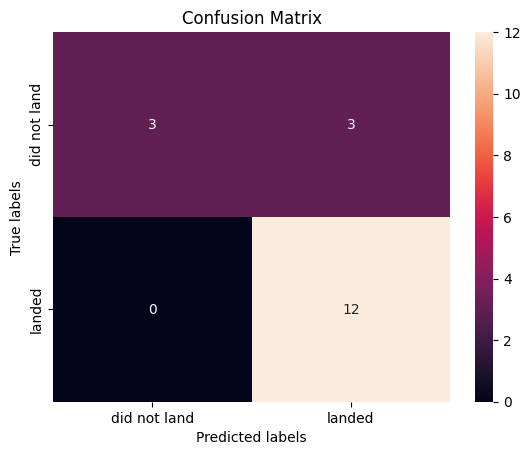

In [10]:
# ------------------------
# --- TASK 7 ---
# ------------------------
print("\n--- TASK 7: SVM Performance on Test Data ---")
# Calculate accuracy on the scaled test data
svm_test_accuracy = svm_cv.score(X_test_scaled, Y_test)
print(f"Accuracy of the tuned SVM model on the test data: {svm_test_accuracy:.4f}")

# Predictions on the scaled test set
y_pred_svm = svm_cv.predict(X_test_scaled)

# Evaluate further
print("\nSVM Test Set Classification Report:")
print(classification_report(Y_test, y_pred_svm))

# Plot confusion matrix
print("\nSVM Confusion Matrix:")
plot_confusion_matrix(Y_test, y_pred_svm)

In [11]:
# ------------------------
# --- TASK 8 ---
# ------------------------
print("\n--- TASK 8: Decision Tree Classifier with GridSearchCV ---")
# Define the model
tree = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility

# Define the parameters for GridSearchCV
parameters_tree = {'criterion': ['gini', 'entropy'],
                   'splitter': ['best', 'random'],
                   'max_depth': [2*n for n in range(1, 8)], # Depths 2, 4, ..., 14
                   'max_features': ['sqrt', 'log2', None], # None means all features
                   'min_samples_leaf': [1, 2, 4, 6],
                   'min_samples_split': [2, 5, 10]}

# Create GridSearchCV object
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters_tree, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the scaled training data
# (Trees are less sensitive to scaling, but for consistency, using scaled data is fine)
tree_cv.fit(X_train_scaled, Y_train)

print("\nTuned hyperparameters (best parameters) for Decision Tree:", tree_cv.best_params_)
print("Best cross-validation accuracy for Decision Tree: {:.4f}".format(tree_cv.best_score_))


--- TASK 8: Decision Tree Classifier with GridSearchCV ---

Tuned hyperparameters (best parameters) for Decision Tree: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best cross-validation accuracy for Decision Tree: 0.8750



--- TASK 9: Decision Tree Performance on Test Data ---
Accuracy of the tuned Decision Tree model on the test data: 0.9444

Decision Tree Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18


Decision Tree Confusion Matrix:


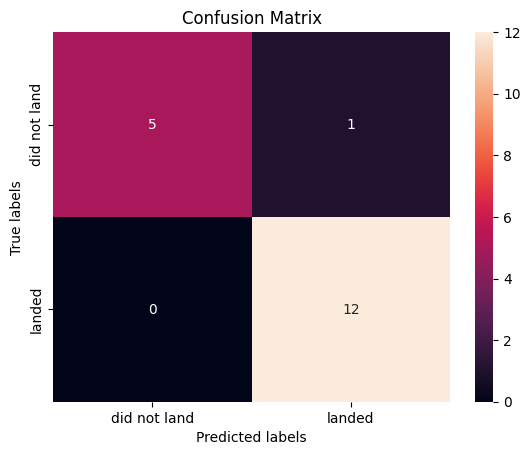

In [12]:
# ------------------------
# --- TASK 9 ---
# ------------------------
print("\n--- TASK 9: Decision Tree Performance on Test Data ---")
# Calculate accuracy on the scaled test data
tree_test_accuracy = tree_cv.score(X_test_scaled, Y_test)
print(f"Accuracy of the tuned Decision Tree model on the test data: {tree_test_accuracy:.4f}")

# Predictions on the scaled test set
y_pred_tree = tree_cv.predict(X_test_scaled)

# Evaluate further
print("\nDecision Tree Test Set Classification Report:")
print(classification_report(Y_test, y_pred_tree))

# Plot confusion matrix
print("\nDecision Tree Confusion Matrix:")
plot_confusion_matrix(Y_test, y_pred_tree)

In [13]:
# ------------------------
# --- TASK 10 ---
# ------------------------
print("\n--- TASK 10: K Nearest Neighbors (KNN) with GridSearchCV ---")
# Define the model
knn = KNeighborsClassifier()

# Define the parameters for GridSearchCV
parameters_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15], # Odd numbers often preferred to avoid ties
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1, 2]} # 1 for Manhattan distance, 2 for Euclidean

# Create GridSearchCV object
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters_knn, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the scaled training data (KNN is sensitive to feature scaling)
knn_cv.fit(X_train_scaled, Y_train)

print("\nTuned hyperparameters (best parameters) for KNN:", knn_cv.best_params_)
print("Best cross-validation accuracy for KNN: {:.4f}".format(knn_cv.best_score_))


--- TASK 10: K Nearest Neighbors (KNN) with GridSearchCV ---

Tuned hyperparameters (best parameters) for KNN: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1}
Best cross-validation accuracy for KNN: 0.8482



--- TASK 11: KNN Performance on Test Data ---
Accuracy of the tuned KNN model on the test data: 0.8333

KNN Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


KNN Confusion Matrix:


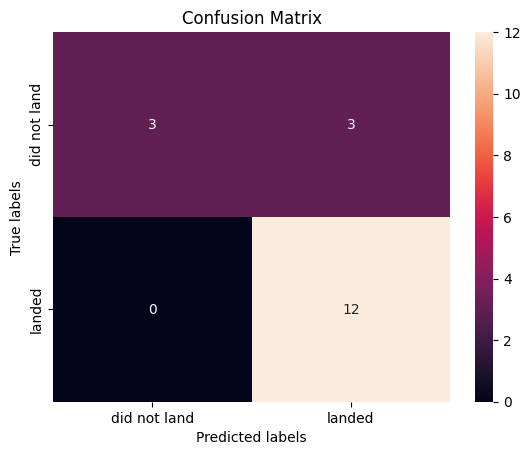

In [14]:
# ------------------------
# --- TASK 11 ---
# ------------------------
print("\n--- TASK 11: KNN Performance on Test Data ---")
# Calculate accuracy on the scaled test data
knn_test_accuracy = knn_cv.score(X_test_scaled, Y_test)
print(f"Accuracy of the tuned KNN model on the test data: {knn_test_accuracy:.4f}")

# Predictions on the scaled test set
y_pred_knn = knn_cv.predict(X_test_scaled)

# Evaluate further
print("\nKNN Test Set Classification Report:")
print(classification_report(Y_test, y_pred_knn))

# Plot confusion matrix
print("\nKNN Confusion Matrix:")
plot_confusion_matrix(Y_test, y_pred_knn)

In [15]:
# ------------------------
# --- TASK 12 ---
# ------------------------
print("\n--- TASK 12: Model Comparison Summary ---")

# Ensure all accuracy variables are defined (they should be if previous tasks ran)
try:
    results_summary = pd.DataFrame({
        'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
        'CV Best Score (Val Acc)': [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_],
        'Test Accuracy': [logreg_test_accuracy, svm_test_accuracy, tree_test_accuracy, knn_test_accuracy]
    })

    # Format the scores to 4 decimal places for better readability
    results_summary['CV Best Score (Val Acc)'] = results_summary['CV Best Score (Val Acc)'].map('{:.4f}'.format)
    results_summary['Test Accuracy'] = results_summary['Test Accuracy'].map('{:.4f}'.format)

    print(results_summary.sort_values(by='Test Accuracy', ascending=False))

    print("\n\nBased on the above results, you can determine which method performed best.")
    print("Consider both the cross-validation score and the final test accuracy.")
    print("Also, look at the classification reports and confusion matrices for more detailed insights into precision, recall, and F1-score for each class.")

except NameError as e:
    print(f"A model's accuracy might be missing. Ensure all previous tasks (4, 7, 9, 11) ran successfully. Error: {e}")

print("\n--- End of Lab ---")


--- TASK 12: Model Comparison Summary ---
                 Model CV Best Score (Val Acc) Test Accuracy
2        Decision Tree                  0.8750        0.9444
0  Logistic Regression                  0.8464        0.8333
1                  SVM                  0.8482        0.8333
3                  KNN                  0.8482        0.8333


Based on the above results, you can determine which method performed best.
Consider both the cross-validation score and the final test accuracy.
Also, look at the classification reports and confusion matrices for more detailed insights into precision, recall, and F1-score for each class.

--- End of Lab ---
